
=== TRAINING with SGD (epochs=150, patience=10) ===


100%|██████████| 170M/170M [00:02<00:00, 76.0MB/s] 


Dataset → Train: 45000 | Val: 5000 | Test: 10000
Epoch 1/150
  Train → Acc: 0.3713, Loss: 1.7239
  Val   → Acc: 0.4716, Loss: 1.4657
  Test  → Acc: 0.4894, Loss: 1.4222
  Time  → 14.2s

Epoch 2/150
  Train → Acc: 0.5032, Loss: 1.3769
  Val   → Acc: 0.5216, Loss: 1.3243
  Test  → Acc: 0.5382, Loss: 1.2836
  Time  → 12.8s

Epoch 3/150
  Train → Acc: 0.5715, Loss: 1.2057
  Val   → Acc: 0.5742, Loss: 1.1791
  Test  → Acc: 0.6151, Loss: 1.0908
  Time  → 12.8s

Epoch 4/150
  Train → Acc: 0.6171, Loss: 1.0769
  Val   → Acc: 0.6198, Loss: 1.0566
  Test  → Acc: 0.6537, Loss: 0.9816
  Time  → 13.0s

Epoch 5/150
  Train → Acc: 0.6460, Loss: 0.9974
  Val   → Acc: 0.6406, Loss: 1.0097
  Test  → Acc: 0.6689, Loss: 0.9749
  Time  → 12.6s

Epoch 6/150
  Train → Acc: 0.6708, Loss: 0.9289
  Val   → Acc: 0.6740, Loss: 0.9249
  Test  → Acc: 0.6842, Loss: 0.9181
  Time  → 13.0s

Epoch 7/150
  Train → Acc: 0.6926, Loss: 0.8756
  Val   → Acc: 0.6820, Loss: 0.9030
  Test  → Acc: 0.6981, Loss: 0.8898
  Time  →

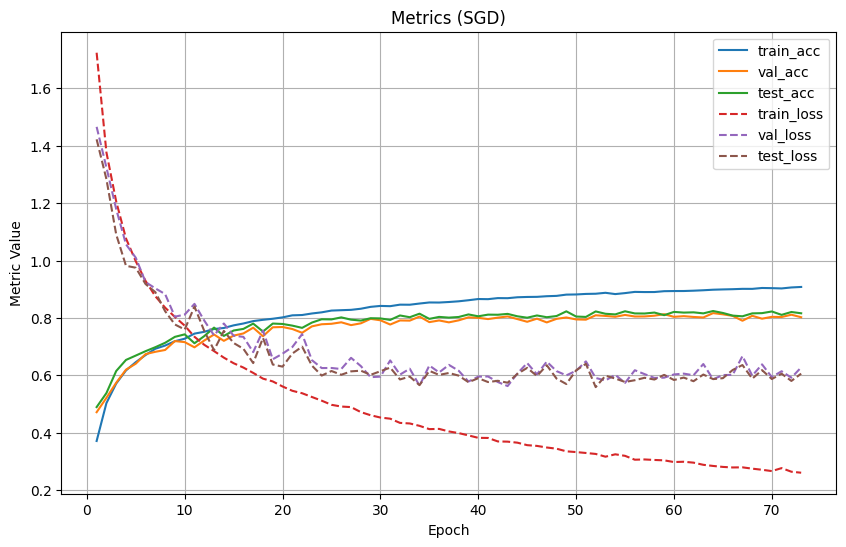

Final SGD → Accuracy: 0.8171, F1: 0.8182, Precision: 0.8246


=== TRAINING with ADAM (epochs=150, patience=10) ===
Dataset → Train: 45000 | Val: 5000 | Test: 10000
Epoch 1/150
  Train → Acc: 0.4223, Loss: 1.5716
  Val   → Acc: 0.4902, Loss: 1.3937
  Test  → Acc: 0.5371, Loss: 1.2941
  Time  → 13.3s

Epoch 2/150
  Train → Acc: 0.5576, Loss: 1.2250
  Val   → Acc: 0.5354, Loss: 1.3554
  Test  → Acc: 0.5577, Loss: 1.3074
  Time  → 13.3s

Epoch 3/150
  Train → Acc: 0.6226, Loss: 1.0687
  Val   → Acc: 0.6146, Loss: 1.1123
  Test  → Acc: 0.6366, Loss: 1.0569
  Time  → 13.3s

Epoch 4/150
  Train → Acc: 0.6598, Loss: 0.9695
  Val   → Acc: 0.6532, Loss: 0.9929
  Test  → Acc: 0.6791, Loss: 0.9224
  Time  → 13.2s

Epoch 5/150
  Train → Acc: 0.6868, Loss: 0.8963
  Val   → Acc: 0.6884, Loss: 0.8930
  Test  → Acc: 0.7078, Loss: 0.8553
  Time  → 13.3s

Epoch 6/150
  Train → Acc: 0.7049, Loss: 0.8425
  Val   → Acc: 0.6932, Loss: 0.8927
  Test  → Acc: 0.7089, Loss: 0.8446
  Time  → 12.9s

Epoch 7/150
  

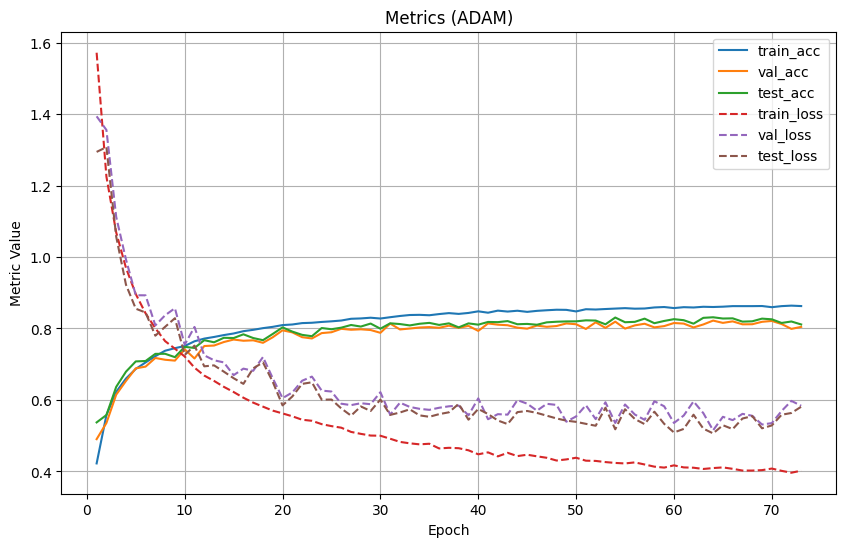

Final ADAM → Accuracy: 0.8313, F1: 0.8303, Precision: 0.8325


=== TRAINING with SAM (epochs=150, patience=10) ===
Dataset → Train: 45000 | Val: 5000 | Test: 10000
Epoch 1/150
  Train → Acc: 0.3986, Loss: 1.7370
  Val   → Acc: 0.4238, Loss: 1.5810
  Test  → Acc: 0.4644, Loss: 1.4887
  Time  → 19.8s

Epoch 2/150
  Train → Acc: 0.5006, Loss: 1.4258
  Val   → Acc: 0.5196, Loss: 1.3311
  Test  → Acc: 0.5554, Loss: 1.2673
  Time  → 19.3s

Epoch 3/150
  Train → Acc: 0.5687, Loss: 1.2596
  Val   → Acc: 0.5722, Loss: 1.2017
  Test  → Acc: 0.5871, Loss: 1.1521
  Time  → 19.1s

Epoch 4/150
  Train → Acc: 0.6135, Loss: 1.1351
  Val   → Acc: 0.6004, Loss: 1.0882
  Test  → Acc: 0.6334, Loss: 1.0387
  Time  → 19.2s

Epoch 5/150
  Train → Acc: 0.6526, Loss: 1.0331
  Val   → Acc: 0.6368, Loss: 1.0078
  Test  → Acc: 0.6632, Loss: 0.9433
  Time  → 19.3s

Epoch 6/150
  Train → Acc: 0.6759, Loss: 0.9677
  Val   → Acc: 0.6418, Loss: 0.9907
  Test  → Acc: 0.6812, Loss: 0.9314
  Time  → 19.5s

Epoch 7/150
  

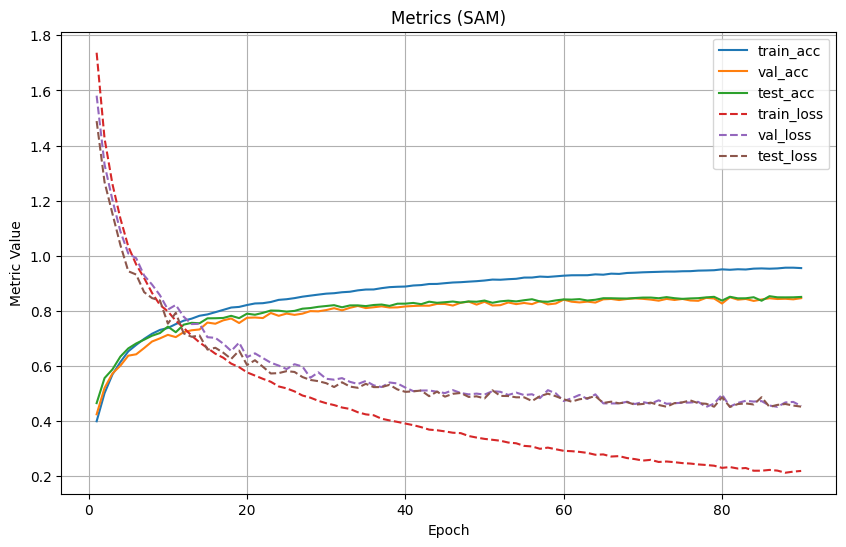

Final SAM → Accuracy: 0.8527, F1: 0.8525, Precision: 0.8529



In [1]:
#!/usr/bin/env python
# train_one_opt.py  ── Huấn luyện ResNet-18 trên CIFAR-10 với SGD / Adam / SAM (chạy tuần tự)

import argparse, time, random
import numpy as np
import torch, torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10
import torchvision.transforms as T, torchvision.models as models
from sklearn.metrics import accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt

# ──────────────────── 1. Tham số dòng lệnh ────────────────────
def get_args():
    parser = argparse.ArgumentParser(description="Train ResNet-18 on CIFAR-10 with SGD/Adam/SAM")
    parser.add_argument('--epochs', type=int, default=150, help='Số epoch (mặc định 150)')
    parser.add_argument('--batch',  type=int, default=128, help='Batch-size train')
    parser.add_argument('--seed',   type=int, default=42,  help='Seed ngẫu nhiên')
    args, _ = parser.parse_known_args()
    return args

args = get_args()

# Thiết lập device + seed reproducible
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(args.seed); np.random.seed(args.seed); random.seed(args.seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(args.seed)

# ──────────────────── 2. Định nghĩa SAM ────────────────────
class SAM(optim.Optimizer):
    """Hai bước Sharpness-Aware Minimization"""
    def __init__(self, params, base_optimizer, rho=0.05, **kwargs):
        defaults = dict(rho=rho, **kwargs)
        super().__init__(params, defaults)
        self.base_optimizer = base_optimizer(self.param_groups, **kwargs)

    @torch.no_grad()
    def first_step(self, zero_grad: bool = False):
        grad_norm = torch.norm(torch.stack([
            p.grad.norm() for g in self.param_groups
            for p in g['params'] if p.grad is not None
        ]))
        for g in self.param_groups:
            scale = g['rho'] / (grad_norm + 1e-12)
            for p in g['params']:
                if p.grad is None: continue
                e_w = p.grad * scale
                p.add_(e_w)
                self.state[p]['e_w'] = e_w.detach()
        if zero_grad: self.zero_grad()

    @torch.no_grad()
    def second_step(self, zero_grad: bool = False):
        for g in self.param_groups:
            for p in g['params']:
                if p.grad is None: continue
                p.sub_(self.state[p]['e_w'])
        self.base_optimizer.step()
        if zero_grad: self.zero_grad()

def make_optimizer(name: str, model: nn.Module):
    if name == 'sgd':
        return optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    if name == 'adam':
        return optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)
    if name == 'sam':
        return SAM(model.parameters(), base_optimizer=optim.SGD,
                   lr=0.01, momentum=0.9, weight_decay=5e-4)
    raise ValueError(f'Unknown optimizer {name}')

# ──────────────────── 3. Data & Augmentation ────────────────────
CIFAR10_MEAN = (0.3914, 0.4822, 0.4465)
CIFAR10_STD  = (0.2023, 0.1994, 0.2010)

def load_cifar10(batch_train: int = 128, batch_eval: int = 256):
    tf_train = T.Compose([
        T.RandomCrop(32, padding=4),
        T.RandomHorizontalFlip(),
        T.ToTensor(),
        T.Normalize(CIFAR10_MEAN, CIFAR10_STD),
    ])
    tf_eval = T.Compose([
        T.ToTensor(),
        T.Normalize(CIFAR10_MEAN, CIFAR10_STD),
    ])

    full_train = CIFAR10(root='./data', train=True, download=True, transform=tf_train)
    test_set   = CIFAR10(root='./data', train=False, download=True, transform=tf_eval)

    n_val = 5000
    train_ds, val_ds = random_split(
        full_train,
        [len(full_train) - n_val, n_val],
        generator=torch.Generator().manual_seed(args.seed)
    )

    common = dict(num_workers=2, pin_memory=torch.cuda.is_available())
    dl_train = DataLoader(train_ds, batch_size=batch_train, shuffle=True,  **common)
    dl_val   = DataLoader(val_ds,   batch_size=batch_eval,  shuffle=False, **common)
    dl_test  = DataLoader(test_set, batch_size=batch_eval,  shuffle=False, **common)

    print(f"Dataset → Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_set)}")
    return dl_train, dl_val, dl_test

# ──────────────────── 4. Mô hình ────────────────────
def get_resnet18(num_classes: int = 10):
    model = models.resnet18(weights=None)
    model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model

# ──────────────────── 5. Vòng huấn luyện với Early Stop và lưu best_val ────────────────────
def train_one_optimizer(opt_name: str, patience: int = 10):
    print(f"\n=== TRAINING with {opt_name.upper()} (epochs={args.epochs}, patience={patience}) ===")
    dl_train, dl_val, dl_test = load_cifar10(args.batch, batch_eval=256)
    model = get_resnet18().to(DEVICE)
    optimizer = make_optimizer(opt_name, model)
    loss_fn = nn.CrossEntropyLoss()

    hist = {k: [] for k in ['train_acc','val_acc','test_acc','train_loss','val_loss','test_loss']}
    best_val_acc = 0.0
    best_val_loss = float('inf')
    best_test_acc = 0.0
    best_test_loss = float('inf')
    best_epoch = 0
    wait = 0

    for ep in range(1, args.epochs + 1):
        t0 = time.time()
        model.train()
        tot_loss = tot_corr = n = 0

        for x, y in dl_train:
            x, y = x.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            logits = model(x)
            loss   = loss_fn(logits, y)

            if opt_name == 'sam':
                loss.backward(); optimizer.first_step(zero_grad=True)
                loss_sam = loss_fn(model(x), y)
                loss_sam.backward(); optimizer.second_step(zero_grad=True)
                with torch.no_grad(): logits = model(x)
            else:
                loss.backward(); optimizer.step()

            tot_loss += loss.item() * y.size(0)
            tot_corr += (logits.argmax(1) == y).sum().item()
            n       += y.size(0)

        train_acc, train_loss = tot_corr / n, tot_loss / n

        # Đánh giá
        def eval_loader(dl):
            model.eval()
            lt = lc = count = 0
            with torch.no_grad():
                for xx, yy in dl:
                    xx, yy = xx.to(DEVICE), yy.to(DEVICE)
                    out = model(xx)
                    l   = loss_fn(out, yy)
                    lt += l.item() * yy.size(0)
                    lc += (out.argmax(1) == yy).sum().item()
                    count += yy.size(0)
            return lc/count, lt/count

        val_acc, val_loss   = eval_loader(dl_val)
        test_acc, test_loss = eval_loader(dl_test)

        # Cập nhật best val
        if val_acc > best_val_acc or (val_acc == best_val_acc and val_loss < best_val_loss):
            best_val_acc = val_acc
            best_val_loss = val_loss
            best_test_acc = test_acc
            best_test_loss = test_loss
            best_epoch = ep
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print(f"Early stopping at epoch {ep} (no improvement in {patience} epochs)")
                break

        # Lưu lịch sử và in
        hist['train_acc'].append(train_acc)
        hist['val_acc'].append(val_acc)
        hist['test_acc'].append(test_acc)
        hist['train_loss'].append(train_loss)
        hist['val_loss'].append(val_loss)
        hist['test_loss'].append(test_loss)
        print(f"Epoch {ep}/{args.epochs}")
        print(f"  Train → Acc: {train_acc:.4f}, Loss: {train_loss:.4f}")
        print(f"  Val   → Acc: {val_acc:.4f}, Loss: {val_loss:.4f}")
        print(f"  Test  → Acc: {test_acc:.4f}, Loss: {test_loss:.4f}")
        print(f"  Time  → {time.time() - t0:.1f}s\n")

    # In best val và test tương ứng
    print(f"Best validation → Epoch: {best_epoch}, Val_acc: {best_val_acc:.4f}, Val_loss: {best_val_loss:.4f}")
    print(f"Corresponding Test → Acc: {best_test_acc:.4f}, Test_loss: {best_test_loss:.4f}\n")

    # Vẽ đồ thị
    epochs = range(1, len(hist['train_acc']) + 1)
    plt.figure(figsize=(10,6))
    plt.plot(epochs, hist['train_acc'], label='train_acc')
    plt.plot(epochs, hist['val_acc'],   label='val_acc')
    plt.plot(epochs, hist['test_acc'],  label='test_acc')
    plt.plot(epochs, hist['train_loss'], label='train_loss', linestyle='--')
    plt.plot(epochs, hist['val_loss'],   label='val_loss',   linestyle='--')
    plt.plot(epochs, hist['test_loss'],  label='test_loss',  linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.title(f'Metrics ({opt_name.upper()})')
    plt.legend(); plt.grid(); plt.show()

    # In kết quả cuối (của epoch cuối)
    model.eval()
    preds, labs = [], []
    with torch.no_grad():
        for x, y in dl_test:
            x, y = x.to(DEVICE), y.to(DEVICE)
            preds.append(model(x).argmax(1).cpu())
            labs.append(y.cpu())
    preds = torch.cat(preds); labs = torch.cat(labs)
    print(f"Final {opt_name.upper()} → Accuracy: {accuracy_score(labs, preds):.4f},"
          f" F1: {f1_score(labs, preds, average='weighted'):.4f},"
          f" Precision: {precision_score(labs, preds, average='weighted'):.4f}\n")

# ──────────────────── 6. Main ────────────────────
if __name__ == '__main__':
    for opt in ['sgd', 'adam', 'sam']:
        train_one_optimizer(opt)
